In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [5]:
# Read in ACT Score CSV
act_scores_df=pd.read_csv('ACT-score-data.csv')
act_scores_df

,School District Code,School District Tested,District Average Score,District Number Tested
0,601,Appling County,19.0,16.0
1,602,Atkinson County,NaN,NaN
2,603,Bacon County,NaN,NaN
3,604,Baker County,NaN,NaN
4,605,Baldwin County,15.6,41.0
...,...,...,...,...
175,786,Social Circle City,21.3,10.0
176,789,Thomasville City,19.7,55.0
177,791,Trion City,19.6,44.0
178,792,Valdosta City,19.9,70.0


In [38]:
# Clean data- remove NaN (&save for future use)
clean_act_score_df=act_scores_df.dropna()
clean_act_score_df.to_csv('ACT_score_data_clean.csv')
clean_act_score_df

,School District Code,School District Tested,District Average Score,District Number Tested
0,601,Appling County,19.0,16.0
4,605,Baldwin County,15.6,41.0
5,606,Banks County,20.1,28.0
6,607,Barrow County,19.3,181.0
7,607,Barrow County,19.3,181.0
...,...,...,...,...
175,786,Social Circle City,21.3,10.0
176,789,Thomasville City,19.7,55.0
177,791,Trion City,19.6,44.0
178,792,Valdosta City,19.9,70.0


In [11]:
# Read in grad/college rate CSV
graduation_rate_df = pd.read_csv("../data_export/school_clean.csv")
graduation_rate_df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.60
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,2017,606,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0,66.04
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26


In [14]:
# Merge dataframes
grad_act_df = pd.merge(clean_act_score_df, graduation_rate_df, on="School District Code")
grad_act_df

,School District Code,School District Tested,District Average Score,District Number Tested,School Year,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,601,Appling County,19.0,16.0,2017,Appling County,ALL,All Schools,198.0,118.0,59.60
1,605,Baldwin County,15.6,41.0,2017,Baldwin County,ALL,All Schools,271.0,171.0,63.10
2,606,Banks County,20.1,28.0,2017,Banks County,ALL,All Schools,209.0,108.0,51.67
3,607,Barrow County,19.3,181.0,2017,Barrow County,ALL,All Schools,724.0,470.0,64.92
4,607,Barrow County,19.3,181.0,2017,Barrow County,ALL,All Schools,724.0,470.0,64.92
...,...,...,...,...,...,...,...,...,...,...,...
149,786,Social Circle City,21.3,10.0,2017,Social Circle City,ALL,All Schools,103.0,64.0,62.14
150,789,Thomasville City,19.7,55.0,2017,Thomasville City,ALL,All Schools,155.0,123.0,79.35
151,791,Trion City,19.6,44.0,2017,Trion City,ALL,All Schools,88.0,69.0,78.41
152,792,Valdosta City,19.9,70.0,2017,Valdosta City,ALL,All Schools,374.0,247.0,66.04


In [16]:
clean_grad_act_df=grad_act_df.drop(columns=['School Year', 'School District Name','School Code','School Name'])
# Add percentage of college enrollment column to dataframe
clean_grad_act_df['Percent of College Enrollment'] = clean_grad_act_df['Postsecondary Institution']/clean_grad_act_df['Graduates']*100
clean_grad_act_df

,School District Code,School District Tested,District Average Score,District Number Tested,Graduates,Postsecondary Institution,Percent,Percent of College Enrollment
0,601,Appling County,19.0,16.0,198.0,118.0,59.60,59.595960
1,605,Baldwin County,15.6,41.0,271.0,171.0,63.10,63.099631
2,606,Banks County,20.1,28.0,209.0,108.0,51.67,51.674641
3,607,Barrow County,19.3,181.0,724.0,470.0,64.92,64.917127
4,607,Barrow County,19.3,181.0,724.0,470.0,64.92,64.917127
...,...,...,...,...,...,...,...,...
149,786,Social Circle City,21.3,10.0,103.0,64.0,62.14,62.135922
150,789,Thomasville City,19.7,55.0,155.0,123.0,79.35,79.354839
151,791,Trion City,19.6,44.0,88.0,69.0,78.41,78.409091
152,792,Valdosta City,19.9,70.0,374.0,247.0,66.04,66.042781


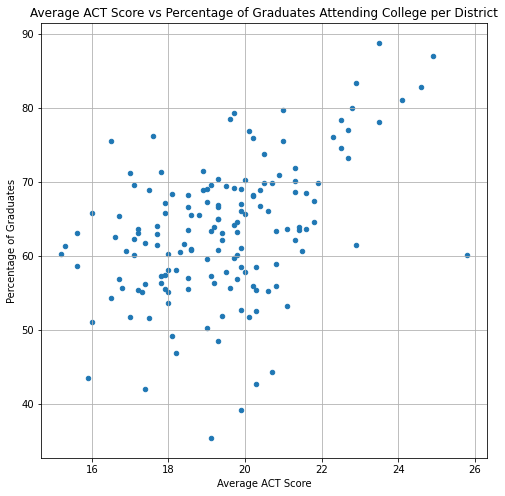

In [31]:
# Compare average ACT score with graduation rate (scatterplot/linear regression)
clean_grad_act_df.plot(kind="scatter", x="District Average Score", y="Percent", grid=True, figsize=(8,8),
              title="Average ACT Score vs Percentage of Graduates Attending College per District")
plt.xlabel('Average ACT Score')
plt.ylabel('Percentage of Graduates')
plt.savefig("Images/ACTvsGradScatter")
plt.show()

The r-squared is: 0.18967243555204544
The p-value is: 1.6526863827968412e-08


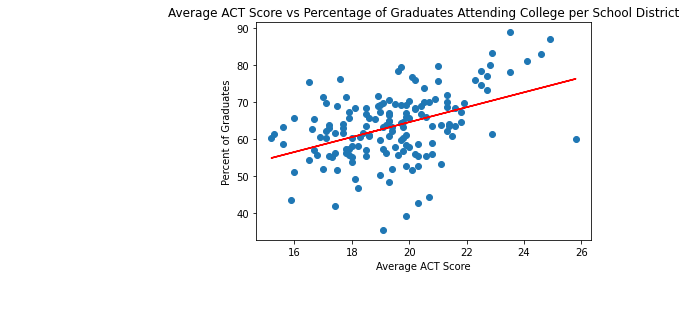

In [36]:
# Linear Regression
x_values = clean_grad_act_df['District Average Score']
y_values = clean_grad_act_df['Percent']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average ACT Score vs Percentage of Graduates Attending College per School District')
plt.xlabel('Average ACT Score')
plt.ylabel('Percent of Graduates')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.savefig("Images/ACTvsGradReg")
plt.show()

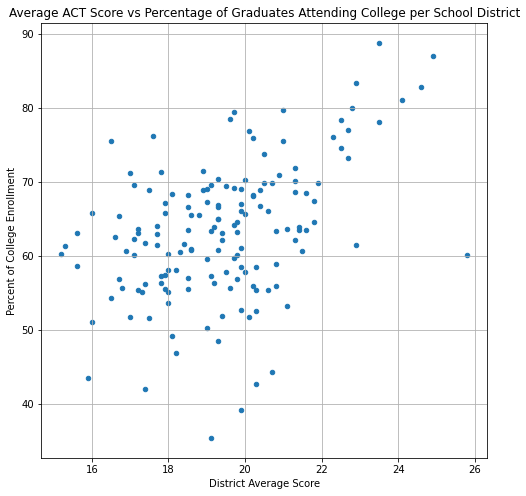

In [33]:
# Compare average SAT score with college enrollment (scatterplot/linear regression)
clean_grad_act_df.plot(kind="scatter", x="District Average Score", y="Percent of College Enrollment", grid=True, figsize=(8,8),
              title="Average ACT Score vs Percentage of Graduates Attending College per School District")
plt.savefig("Images/ACTvsCollegeScatter")
plt.show()

The r-squared is: 0.18961994424953724
The p-value is: 1.661058478441053e-08


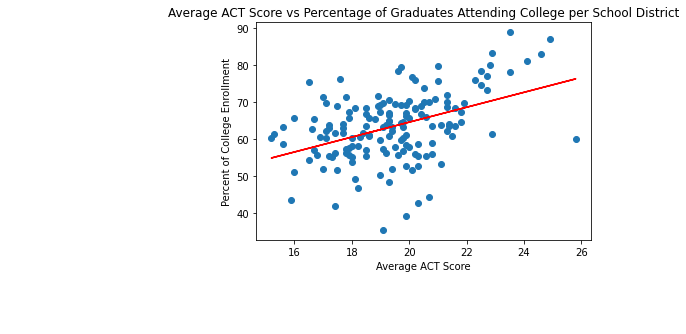

In [35]:
x_values = clean_grad_act_df['District Average Score']
y_values = clean_grad_act_df['Percent of College Enrollment']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average ACT Score vs Percentage of Graduates Attending College per School District')
plt.xlabel('Average ACT Score')
plt.ylabel('Percent of College Enrollment')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.savefig("Images/ACTvsCollegeReg")
plt.show()